In [ ]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [ ]:
#from google.colab import drive
# Kết nối vào Google Drive
#drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df1 = pd.read_excel("2018-Vietnam.xlsx", skiprows=8)
df2 = pd.read_excel('2019-Vietnam.xlsx', skiprows=8)
df3 = pd.read_excel('2020-Vietnam.xlsx', skiprows=8)
df4 = pd.read_excel('2021-Vietnam.xlsx', skiprows=8)
df5 = pd.read_excel('2022-Vietnam.xlsx', skiprows=8)


In [ ]:
df_all_sheets = pd.read_excel('Price-Vol VN 2015-2023.xlsx', sheet_name=None)

In [ ]:
# Kiểm tra và gán giá trị cho từng trang tính tương ứng
if 'Info' in df_all_sheets:
    info = df_all_sheets['Info']
else:
    print("Không tìm thấy trang tính 'Info' trong file Excel.")

if 'Price' in df_all_sheets:
    price = df_all_sheets['Price']
else:
    print("Không tìm thấy trang tính 'Price' trong file Excel.")

if 'Volume' in df_all_sheets:
    volume = df_all_sheets['Volume']
else:
    print("Không tìm thấy trang tính 'Volume' trong file Excel.")

In [ ]:
dfs = [df1, df2, df3, df4, df5]

# Drop rows from index 1664 to the end for all DataFrames except the first one
for i in range(1, len(dfs)):
    dfs[i] = dfs[i].drop(range(1664, len(dfs[i])))

In [ ]:
for i, df in enumerate(dfs, start=1):
    # Lấy tên cột và thực hiện tách và gán lại tên cột
    column_names_cleaned = df.columns.str.split('\n').str[0]
    df.columns = column_names_cleaned
data= pd.concat(dfs, ignore_index=True)

In [ ]:
df = data[(data['Ngành ICB - cấp 3'] == 'Sản xuất thực phẩm') & (data['Ngành ICB - cấp 4'] == 'Thực phẩm')]
df

,STT,Mã,Tên công ty,Sàn,Ngành ICB - cấp 1,Ngành ICB - cấp 2,Ngành ICB - cấp 3,Ngành ICB - cấp 4,Quý,Năm,...,TM. Chi phí tài chính khác,TM. Chi phí sản xuất theo yếu tố,"TM. Chi phí nguyên liệu, vật liệu",TM. Chi phí nhân công,TM.Chi phí khấu hao tài sản cố định,TM. Chi phí dịch vụ mua ngoài,TM. Chi phí khác bằng tiền,BCTCKH. Doanh thu kế hoạch,BCTCKH. Tổng lợi nhuận kế toán trước thuế,BCTCKH. Lợi nhuận sau thuế thu nhập doanh nghiệp
11,12,MSN,Tập đoàn Masan,HOSE,Hàng Tiêu dùng,Thực phẩm và đồ uống,Sản xuất thực phẩm,Thực phẩm,5.0,2021.0,...,8.349870e+11,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+14,7.750000e+12,6.200000e+12
27,28,VNM,VINAMILK,HOSE,Hàng Tiêu dùng,Thực phẩm và đồ uống,Sản xuất thực phẩm,Thực phẩm,5.0,2021.0,...,5.505414e+10,4.708378e+13,2.679176e+13,2.610866e+12,2.114227e+12,3.328400e+12,1.223853e+13,6.407000e+13,1.200000e+13,9.770000e+12
43,44,AGM,XNK An Giang,HOSE,Hàng Tiêu dùng,Thực phẩm và đồ uống,Sản xuất thực phẩm,Thực phẩm,5.0,2021.0,...,2.458474e+09,1.842552e+12,1.584126e+12,5.483297e+10,1.625175e+10,1.434397e+11,4.390090e+10,3.939000e+12,2.500000e+10,2.000000e+10
55,56,BBC,Bánh kẹo BIBICA,HOSE,Hàng Tiêu dùng,Thực phẩm và đồ uống,Sản xuất thực phẩm,Thực phẩm,5.0,2021.0,...,0.000000e+00,1.074128e+12,6.207884e+11,1.057337e+11,7.039371e+10,2.607290e+11,1.648276e+10,1.900000e+12,1.000000e+11,8.000000e+10
195,196,HSL,Thực phẩm Hồng Hà,HOSE,Hàng Tiêu dùng,Thực phẩm và đồ uống,Sản xuất thực phẩm,Thực phẩm,5.0,2021.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.900000e+11,2.875000e+10,2.300000e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8252,1586,VHF,Chế biến lương thực Vĩnh Hà,UPCoM,Hàng Tiêu dùng,Thực phẩm và đồ uống,Sản xuất thực phẩm,Thực phẩm,5.0,2022.0,...,0.000000e+00,5.234591e+10,1.675451e+10,9.979129e+08,2.270188e+09,8.439796e+09,2.388350e+10,5.200000e+11,1.025000e+10,8.200000e+09
8265,1599,VLF,Lương thực Vĩnh Long,UPCoM,Hàng Tiêu dùng,Thực phẩm và đồ uống,Sản xuất thực phẩm,Thực phẩm,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8280,1614,VOC,Dầu thực vật Việt Nam,UPCoM,Hàng Tiêu dùng,Thực phẩm và đồ uống,Sản xuất thực phẩm,Thực phẩm,5.0,2022.0,...,3.000000e+08,9.373991e+11,8.651957e+11,3.592864e+10,1.155670e+10,2.095139e+10,3.766674e+09,1.236000e+12,1.300000e+12,1.040000e+12
8288,1622,VSF,Vinafood 2,UPCoM,Hàng Tiêu dùng,Thực phẩm và đồ uống,Sản xuất thực phẩm,Thực phẩm,5.0,2022.0,...,1.523085e+09,1.409116e+13,9.867947e+12,4.496662e+11,1.526739e+11,3.398418e+12,2.224503e+11,8.700450e+12,2.500000e+09,2.000000e+09


In [ ]:
df.shape

(265, 168)

In [ ]:
df['Mã'].nunique()
#Có 53 doanh nghiệp thuộc nhóm ngành ICB cấp 3 là Sản xuất thực phẩm và ngành cấp 4 là Thực phẩm

53

In [ ]:
df['Tên công ty'].unique()

array(['Tập đoàn Masan', 'VINAMILK', 'XNK An Giang', 'Bánh kẹo BIBICA',
       'Thực phẩm Hồng Hà', 'Tập đoàn KIDO', 'Chế biến Hàng XK Long An',
       'Mía đường Lam Sơn', 'Tập đoàn PAN',
       'Mía đường Thành Thành Công - Biên Hòa', 'Thực phẩm Bích Chi',
       'Đầu tư SX Bảo Ngọc', 'Đồ hộp Hạ Long', 'Bánh kẹo Hải Hà',
       'Đường Kon Tum', 'Cơ khí và Lương thực Thực phẩm',
       'Khách sạn và Dịch vụ OCH', 'Thực Phẩm SAFOCO',
       'Bánh phồng tôm Sa Giang', 'Mía đường Sơn La', 'Trang Corp.',
       'Rau quả thực phẩm An Giang', 'Nông sản Quảng Ngãi',
       'Lương Thực Bình Định', 'Bột mỳ Vinafood 1', 'Công ty 22',
       'Mía đường Cao Bằng', 'XNK và Đầu tư Chợ Lớn (CHOLIMEX)',
       'Thực phẩm Cholimex', 'Camimex', 'Colusa -  Miliket',
       'Lương thực TP Hồ Chí Minh', 'Thực phẩm G.C', 'Thực phẩm Hà Nội',
       'Bánh kẹo Hải Châu', 'Thực phẩm Hà Nội - Kinh Bắc',
       'Bánh kẹo Hữu Nghị', 'HANOIMILK', 'Sữa Quốc tế',
       'Thương mại Kiên Giang', 'Hàng Tiêu Dùng MaSan

Các chỉ số tài chính của MSN so sánh với chỉ số ngành

In [ ]:
df_2018 = df[df['Năm'] == 2018]
df_2019 = df[df['Năm'] == 2019]
df_2021 = df[df['Năm'] == 2021]
df_2022 = df[df['Năm'] == 2022]
df_2020 = df[df['Năm'] == 2020]

df_2021.head()

,STT,Mã,Tên công ty,Sàn,Ngành ICB - cấp 1,Ngành ICB - cấp 2,Ngành ICB - cấp 3,Ngành ICB - cấp 4,Quý,Năm,...,TM. Chi phí tài chính khác,TM. Chi phí sản xuất theo yếu tố,"TM. Chi phí nguyên liệu, vật liệu",TM. Chi phí nhân công,TM.Chi phí khấu hao tài sản cố định,TM. Chi phí dịch vụ mua ngoài,TM. Chi phí khác bằng tiền,BCTCKH. Doanh thu kế hoạch,BCTCKH. Tổng lợi nhuận kế toán trước thuế,BCTCKH. Lợi nhuận sau thuế thu nhập doanh nghiệp
11,12,None,Tập đoàn Masan,HOSE,Hàng Tiêu dùng,Thực phẩm và đồ uống,Sản xuất thực phẩm,Thực phẩm,5.0,2021.0,...,8.349870e+11,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+14,7.750000e+12,6.200000e+12
27,28,None,VINAMILK,HOSE,Hàng Tiêu dùng,Thực phẩm và đồ uống,Sản xuất thực phẩm,Thực phẩm,5.0,2021.0,...,5.505414e+10,4.708378e+13,2.679176e+13,2.610866e+12,2.114227e+12,3.328400e+12,1.223853e+13,6.407000e+13,1.200000e+13,9.770000e+12
43,44,None,XNK An Giang,HOSE,Hàng Tiêu dùng,Thực phẩm và đồ uống,Sản xuất thực phẩm,Thực phẩm,5.0,2021.0,...,2.458474e+09,1.842552e+12,1.584126e+12,5.483297e+10,1.625175e+10,1.434397e+11,4.390090e+10,3.939000e+12,2.500000e+10,2.000000e+10
55,56,None,Bánh kẹo BIBICA,HOSE,Hàng Tiêu dùng,Thực phẩm và đồ uống,Sản xuất thực phẩm,Thực phẩm,5.0,2021.0,...,0.000000e+00,1.074128e+12,6.207884e+11,1.057337e+11,7.039371e+10,2.607290e+11,1.648276e+10,1.900000e+12,1.000000e+11,8.000000e+10
195,196,None,Thực phẩm Hồng Hà,HOSE,Hàng Tiêu dùng,Thực phẩm và đồ uống,Sản xuất thực phẩm,Thực phẩm,5.0,2021.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.900000e+11,2.875000e+10,2.300000e+10


Không chạy lại code này check null để tránh lỗi :<<

## Kiểm tra xử lý null

In [ ]:
# Kiểm tra giá trị null cho từng năm
kiem_tra_null_2021 = df_2021.isnull().sum()
kiem_tra_null_2022 = df_2022.isnull().sum()
kiem_tra_null_2020 = df_2020.isnull().sum()
kiem_tra_null_2019 = df_2019.isnull().sum()
kiem_tra_null_2018 = df_2018.isnull().sum()

# Hiển thị kết quả
print("Kiểm tra giá trị null cho df_2021:")
print(kiem_tra_null_2021)

print("\nKiểm tra giá trị null cho df_2022:")
print(kiem_tra_null_2022)

print("\nKiểm tra giá trị null cho df_2020:")
print(kiem_tra_null_2020)

print("\nKiểm tra giá trị null cho df_2019:")
print(kiem_tra_null_2019)

print("\nKiểm tra giá trị null cho df_2018:")
print(kiem_tra_null_2018)

Kiểm tra giá trị null cho df_2021:
STT                                                  0
Mã                                                   0
Tên công ty                                          0
Sàn                                                  0
Ngành ICB - cấp 1                                    0
                                                    ..
TM. Chi phí dịch vụ mua ngoài                       21
TM. Chi phí khác bằng tiền                          21
BCTCKH. Doanh thu kế hoạch                           2
BCTCKH. Tổng lợi nhuận kế toán trước thuế            2
BCTCKH. Lợi nhuận sau thuế thu nhập doanh nghiệp     2
Length: 168, dtype: int64

Kiểm tra giá trị null cho df_2022:
STT                                                  0
Mã                                                   0
Tên công ty                                          0
Sàn                                                  0
Ngành ICB - cấp 1                                    0
                       

In [ ]:
dfs = [df_2021, df_2022, df_2020, df_2019, df_2018]

# Kiểm tra và liệt kê các cột có giá trị null cho từng DataFrame
#for i, df in enumerate(dfs):
 #   nam = 2022 - i  # Tính năm tương ứng với DataFrame hiện tại
  #  null_columns = df.columns[df.isnull().any()].tolist()
#
 #   if null_columns:
  #      print(f"Các cột có giá trị null trong DataFrame năm {nam}: {null_columns}")
   # else:
    #    print(f"Không có cột nào có giá trị null trong DataFrame năm {nam}")

Các cột có giá trị null trong DataFrame năm 2022: ['LCTT. Lãi trước thuế', 'LCTT. Khấu hao TSCĐ  ', 'LCTT. Lãi/(lỗ) trước những thay đổi vốn lưu động', 'TM. Tiền', 'TM. Tiền mặt', 'TM. Tiền gửi Ngân hàng', 'TM. Tiền đang chuyển', 'TM. Tiền và tương đương tiền', 'TM. Đầu tư tài chính NH', 'TM. Chứng khoán đầu tư ngắn hạn', 'TM. Đầu tư nắm giữ đến ngày đáo hạn', 'TM.Đầu tư ngắn hạn', 'TM. Đầu tư dài hạn', 'TM. Đầu tư NH khác', 'TM. Dự phòng giảm giá ĐTNH', 'TM. Hàng tồn kho', 'TM. Hàng mua đang đi đường', 'TM. Nguyên liệu, vật liệu ', 'TM. Công cụ, dụng cụ ', 'TM. Chi phí SX, KD dở dang', 'TM.Thành phẩm ', 'TM. Hàng hóa ', 'TM. Hàng gửi đi bán', 'TM. Hàng hoá kho bảo thuế', 'TM. Hàng hoá bất động sản', 'TM. Đầu tư dài hạn khác', 'TM. Đầu tư cổ phiếu', 'TM. Đầu tư trái phiếu', 'TM. Đầu tư tín phiếu, kỳ phiếu ', 'TM. Cho vay dài hạn', 'TM. Đầu tư dài hạn khác', 'TM. Vay và nợ ngắn hạn', 'TM. Vay ngắn hạn', 'TM. Vay dài hạn đến hạn trả', 'TM. Giá gốc Lợi thế thương mại', 'TM. Số dư đầu kỳ',

In [ ]:
#for i, df in enumerate(dfs):
 #   nam = 2022 - i
  #  null_columns_cdkts = [col for col in df.columns if col.startswith("CĐKT") and df[col].isnull().any()]
#
 #   if null_columns_cdkts:
   #     print(f"Các cột có giá trị null và bắt đầu bằng 'CĐKT' trong DataFrame năm {nam}: {null_columns_cdkts}")
  #  else:
    #    print(f"Không có cột nào có giá trị null và bắt đầu bằng 'CĐKT' trong DataFrame năm {nam}")
# Không bị missing value các giá trị ở bảng CĐKT

Không có cột nào có giá trị null và bắt đầu bằng 'CĐKT' trong DataFrame năm 2022
Không có cột nào có giá trị null và bắt đầu bằng 'CĐKT' trong DataFrame năm 2021
Không có cột nào có giá trị null và bắt đầu bằng 'CĐKT' trong DataFrame năm 2020
Không có cột nào có giá trị null và bắt đầu bằng 'CĐKT' trong DataFrame năm 2019
Không có cột nào có giá trị null và bắt đầu bằng 'CĐKT' trong DataFrame năm 2018


In [ ]:
#for i, df in enumerate(dfs):
 #   nam = 2022 - i  # Tính năm tương ứng với DataFrame hiện tại
  #  null_columns_tms = [col for col in df.columns if col.startswith("LCTT") and df[col].isnull().any()]

#    if null_columns_tms:
 #       print(f"Các cột có giá trị null và bắt đầu bằng 'LCTT' trong DataFrame năm {nam}: {null_columns_tms}")
  #  else:
   #     print(f"Không có cột nào có giá trị null và bắt đầu bằng 'LCTT' trong DataFrame năm {nam}")

In [ ]:
# Kiểm tra và liệt kê các cột có giá trị null và bắt đầu bằng 'KQKD' cho từng DataFrame
#for i, df in enumerate(dfs):
#    nam = 2022 - i  # Tính năm tương ứng với DataFrame hiện tại
 #   null_columns_kqkds = [col for col in df.columns if col.startswith("KQKD") and df[col].isnull().any()]
#
 #   if null_columns_kqkds:
  #      print(f"Các cột có giá trị null và bắt đầu bằng 'KQKD' trong DataFrame năm {nam}: {null_columns_kqkds}")
   # else:
   #     print(f"Không có cột nào có giá trị null và bắt đầu bằng 'KQKD' trong DataFrame năm {nam}")

In [ ]:
#Kiểm tra và liệt kê các cột có giá trị null và bắt đầu bằng 'KQKD' cho từng DataFrame
#for i, df in enumerate(dfs):
#    nam = 2022 - i  # Tính năm tương ứng với DataFrame hiện tại
#    null_columns_kqkds = [col for col in df.columns if col.startswith("KQKD") and df[col].isnull().any()]

#    if null_columns_kqkds:
  #      print(f"Các cột có giá trị null và bắt đầu bằng 'KQKD' trong DataFrame năm {nam}: {null_columns_kqkds}")
 #   else:
 #       print(f"Không có cột nào có giá trị null và bắt đầu bằng 'KQKD' trong DataFrame năm {nam}")

Không có cột nào có giá trị null và bắt đầu bằng 'KQKD' trong DataFrame năm 2022
Không có cột nào có giá trị null và bắt đầu bằng 'KQKD' trong DataFrame năm 2021
Các cột có giá trị null và bắt đầu bằng 'KQKD' trong DataFrame năm 2020: ['KQKD. Lợi nhuận khác', 'KQKD. Chi phí thuế thu nhập doanh nghiệp']
Các cột có giá trị null và bắt đầu bằng 'KQKD' trong DataFrame năm 2019: ['KQKD. Lợi nhuận khác', 'KQKD. Chi phí thuế thu nhập doanh nghiệp']
Các cột có giá trị null và bắt đầu bằng 'KQKD' trong DataFrame năm 2018: ['KQKD. Lợi nhuận khác', 'KQKD. Chi phí thuế thu nhập doanh nghiệp']


--> Kết quả null tại các vị trí không sử dụng đến --> không thực hiện xử lý null ở các bảng Kết quả kinh doanh

## Tạo bảng số liệu của ngành và MSN

In [ ]:
# Lọc dữ liệu cho năm 2021 và loại bỏ các cột không cần tính trung bình
df_2018 = df[df['Năm'] == 2018].drop(columns=['STT', 'Mã', 'Tên công ty', 'Sàn', 'Ngành ICB - cấp 1', 'Ngành ICB - cấp 2', 'Ngành ICB - cấp 3', 'Ngành ICB - cấp 4',"Quý","Năm","Trạng thái kiểm toán"])
df_tb2018 = pd.DataFrame({'2018': df_2018.mean()})

df_2019 = df[df['Năm'] == 2019].drop(columns=['STT', 'Mã', 'Tên công ty', 'Sàn', 'Ngành ICB - cấp 1', 'Ngành ICB - cấp 2', 'Ngành ICB - cấp 3', 'Ngành ICB - cấp 4',"Quý","Năm","Trạng thái kiểm toán" ])
df_tb2019 = pd.DataFrame({'2019': df_2019.mean()})

df_2020 = df[df['Năm'] == 2020].drop(columns=['STT', 'Mã', 'Tên công ty', 'Sàn', 'Ngành ICB - cấp 1', 'Ngành ICB - cấp 2', 'Ngành ICB - cấp 3', 'Ngành ICB - cấp 4',"Quý","Năm", "Trạng thái kiểm toán"])
df_tb2020 = pd.DataFrame({'2020': df_2020.mean()})

df_2021 = df[df['Năm'] == 2021].drop(columns=['STT', 'Mã', 'Tên công ty', 'Sàn', 'Ngành ICB - cấp 1', 'Ngành ICB - cấp 2', 'Ngành ICB - cấp 3', 'Ngành ICB - cấp 4',"Quý","Năm", "Trạng thái kiểm toán"])
df_tb2021 = pd.DataFrame({'2021': df_2021.mean()})

df_2022 = df[df['Năm'] == 2022].drop(columns=['STT', 'Mã', 'Tên công ty', 'Sàn', 'Ngành ICB - cấp 1', 'Ngành ICB - cấp 2', 'Ngành ICB - cấp 3', 'Ngành ICB - cấp 4',"Quý","Năm", "Trạng thái kiểm toán"])
df_tb2022 = pd.DataFrame({'2022': df_2022.mean()})

df_gop = pd.concat([df_tb2018, df_tb2019, df_tb2020, df_tb2021, df_tb2022], axis=1)
df_indus= df_gop.transpose()
df_indus



,CĐKT. TÀI SẢN NGẮN HẠN,CĐKT. Tiền và tương đương tiền,CĐKT. Đầu tư tài chính ngắn hạn,CĐKT. Các khoản phải thu ngắn hạn,"CĐKT. Hàng tồn kho, ròng",CĐKT. Tài sản ngắn hạn khác,CĐKT. TÀI SẢN DÀI HẠN,CĐKT. Phải thu dài hạn,CĐKT. Tài sản cố định,CĐKT. GTCL TSCĐ hữu hình,...,TM. Chi phí tài chính khác,TM. Chi phí sản xuất theo yếu tố,"TM. Chi phí nguyên liệu, vật liệu",TM. Chi phí nhân công,TM.Chi phí khấu hao tài sản cố định,TM. Chi phí dịch vụ mua ngoài,TM. Chi phí khác bằng tiền,BCTCKH. Doanh thu kế hoạch,BCTCKH. Tổng lợi nhuận kế toán trước thuế,BCTCKH. Lợi nhuận sau thuế thu nhập doanh nghiệp
2018,1.662021e+12,3.150455e+11,3.172413e+11,4.392241e+11,5.266015e+11,6.390903e+10,2.714659e+12,2.179463e+11,1.611834e+12,1.281425e+12,...,9.442119e+09,2.525091e+12,1.755353e+12,1.738855e+11,9.133464e+10,1.558941e+11,3.486241e+11,4.819125e+12,5.703151e+11,4.613376e+11
2019,2.149106e+12,4.126150e+11,4.428118e+11,6.271905e+11,6.056496e+11,6.083909e+10,3.404174e+12,2.378293e+11,1.954398e+12,1.471209e+12,...,9.448526e+09,3.087990e+12,2.065803e+12,2.309525e+11,2.039420e+11,1.736059e+11,4.136867e+11,6.198275e+12,6.186661e+11,5.028459e+11
2020,2.553954e+12,4.816333e+11,5.520694e+11,7.273079e+11,7.183139e+11,7.462933e+10,3.640227e+12,2.330233e+11,2.119755e+12,1.567293e+12,...,2.543076e+10,3.154636e+12,1.950293e+12,2.089490e+11,2.991394e+11,2.099442e+11,4.863105e+11,6.932692e+12,7.170786e+11,5.815750e+11
2021,3.510516e+12,9.770936e+11,7.387250e+11,8.863575e+11,8.436617e+11,6.467779e+10,3.315545e+12,7.917001e+10,1.903352e+12,1.479130e+12,...,3.748736e+10,4.270828e+12,3.024242e+12,2.607811e+11,1.413320e+11,2.573890e+11,5.870848e+11,7.055768e+12,7.773018e+11,6.293592e+11
2022,3.740777e+12,6.771862e+11,7.677891e+11,1.330839e+12,8.854492e+11,7.951256e+10,3.590245e+12,1.012325e+11,1.912783e+12,1.452367e+12,...,3.507854e+10,4.271029e+12,2.915278e+12,2.556071e+11,1.363902e+11,3.458656e+11,6.178879e+11,6.852739e+12,7.096823e+11,5.761465e+11


In [ ]:
df_msn = df[df['Mã'] == 'MSN']
df_msn = df_msn.sort_values(by='Năm', ascending=True)
df_msn = df_msn.drop(['STT', 'Mã', 'Tên công ty', 'Sàn', 'Ngành ICB - cấp 1', 'Ngành ICB - cấp 2', 'Ngành ICB - cấp 3', 'Ngành ICB - cấp 4', 'Quý',"Trạng thái kiểm toán"], axis=1)
df_msn = df_msn.set_index('Năm')
df_msn

,CĐKT. TÀI SẢN NGẮN HẠN,CĐKT. Tiền và tương đương tiền,CĐKT. Đầu tư tài chính ngắn hạn,CĐKT. Các khoản phải thu ngắn hạn,"CĐKT. Hàng tồn kho, ròng",CĐKT. Tài sản ngắn hạn khác,CĐKT. TÀI SẢN DÀI HẠN,CĐKT. Phải thu dài hạn,CĐKT. Tài sản cố định,CĐKT. GTCL TSCĐ hữu hình,...,TM. Chi phí tài chính khác,TM. Chi phí sản xuất theo yếu tố,"TM. Chi phí nguyên liệu, vật liệu",TM. Chi phí nhân công,TM.Chi phí khấu hao tài sản cố định,TM. Chi phí dịch vụ mua ngoài,TM. Chi phí khác bằng tiền,BCTCKH. Doanh thu kế hoạch,BCTCKH. Tổng lợi nhuận kế toán trước thuế,BCTCKH. Lợi nhuận sau thuế thu nhập doanh nghiệp
Năm,,,,,,,,,,,,,,,,,,,,,
2018.0,1.249962e+13,4.585889e+12,3.758480e+11,2.412555e+12,4.333191e+12,7.921350e+11,5.207900e+13,1.377124e+12,2.920376e+13,2.379821e+13,...,3.316310e+11,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,5.000000e+13,6.875000e+12,5.500000e+12
2019.0,2.426189e+13,6.800528e+12,7.844540e+11,5.417776e+12,9.621821e+12,1.637313e+12,7.303536e+13,1.599646e+12,4.079170e+13,2.917088e+13,...,2.734290e+11,2.748584e+12,0.0,0.0,2.748584e+12,0.0,0.0,8.500000e+13,3.750000e+12,3.000000e+12
2020.0,2.976068e+13,7.721442e+12,4.472500e+11,7.051442e+12,1.249792e+13,2.042634e+12,8.597588e+13,1.592008e+12,4.958219e+13,3.432176e+13,...,5.232930e+11,4.583989e+12,0.0,0.0,4.583989e+12,0.0,0.0,1.020000e+14,5.000000e+12,4.000000e+12
2021.0,4.363018e+13,2.230482e+13,3.327530e+11,6.634409e+12,1.281339e+13,1.544801e+12,8.246330e+13,1.878478e+12,4.265394e+13,3.115163e+13,...,8.349870e+11,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,1.000000e+14,7.750000e+12,6.200000e+12
2022.0,4.767462e+13,1.385310e+13,3.659175e+12,1.392956e+13,1.444534e+13,1.787444e+12,9.366819e+13,2.113762e+12,4.353536e+13,3.061153e+13,...,7.139550e+11,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,1.000000e+14,6.250000e+12,5.000000e+12


# Chỉ số tài chính

## Tính tỷ số thanh khoản

In [ ]:
df_msn['EBIT'] = df_msn['KQKD. Tổng lợi nhuận kế toán trước thuế'] + (- df_msn['KQKD. Trong đó: Chi phí lãi vay'])

<ipython-input-17-c0b351dbd50c>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_msn['EBIT'] = df_msn['KQKD. Tổng lợi nhuận kế toán trước thuế'] + (- df_msn['KQKD. Trong đó: Chi phí lãi vay'])


<ipython-input-18-ecd395bae7c6>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_msn['Current Ratio'] = df_msn['CĐKT. TÀI SẢN NGẮN HẠN'] / df_msn['CĐKT. Nợ ngắn hạn']


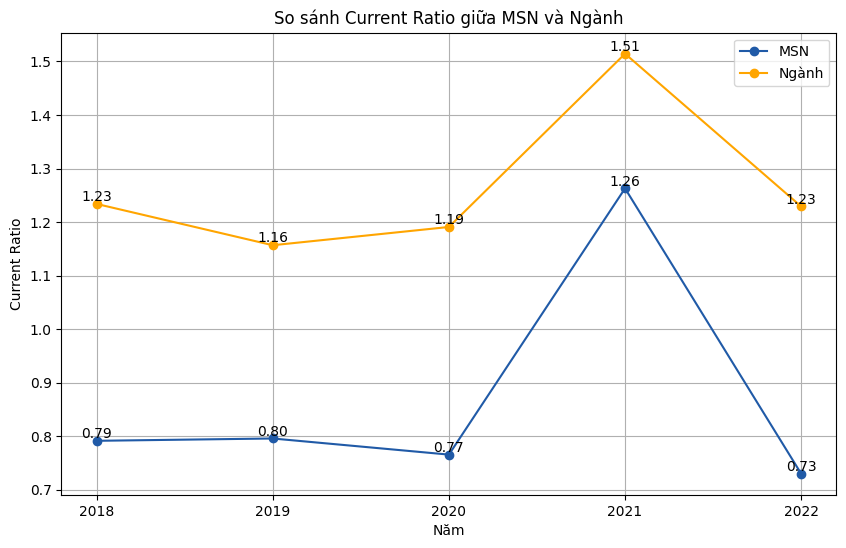

In [ ]:
# Tính current ratio

df_msn['Current Ratio'] = df_msn['CĐKT. TÀI SẢN NGẮN HẠN'] / df_msn['CĐKT. Nợ ngắn hạn']
df_indus['Current Ratio'] = df_indus['CĐKT. TÀI SẢN NGẮN HẠN'] / df_indus['CĐKT. Nợ ngắn hạn']

# Dữ liệu
years_msn = df_msn.index.astype(int)
current_ratio_msn = df_msn['Current Ratio']

years_indus = df_indus.index.astype(int)
current_ratio_indus = df_indus['Current Ratio']

# Vẽ biểu đồ đường
plt.figure(figsize=(10, 6))
plt.plot(years_msn, current_ratio_msn, label='MSN', marker='o',color="#205AA7")
plt.plot(years_indus, current_ratio_indus, label='Ngành', marker='o',color="orange")

# Đặt các nhãn và tiêu đề
plt.xlabel('Năm')
plt.ylabel('Current Ratio')
plt.title('So sánh Current Ratio giữa MSN và Ngành')

# Chỉnh lại nhãn trục x
plt.xticks(years_msn)

# Thêm giá trị tại các điểm
for i, txt in enumerate(current_ratio_msn):
    plt.text(years_msn[i], txt, f'{txt:.2f}', ha='center', va='bottom')

for i, txt in enumerate(current_ratio_indus):
    plt.text(years_indus[i], txt, f'{txt:.2f}', ha='center', va='bottom')

# Hiển thị chú thích
plt.legend()

# Hiển thị biểu đồ
plt.grid(True)
plt.show()


<ipython-input-202-7069249638a1>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_msn['Quick Ratio'] = (df_msn['CĐKT. TÀI SẢN NGẮN HẠN']-(df_msn['CĐKT. Hàng tồn kho, ròng']+ df_msn['CĐKT. Tài sản ngắn hạn khác']))/ df_msn['CĐKT. Nợ ngắn hạn']


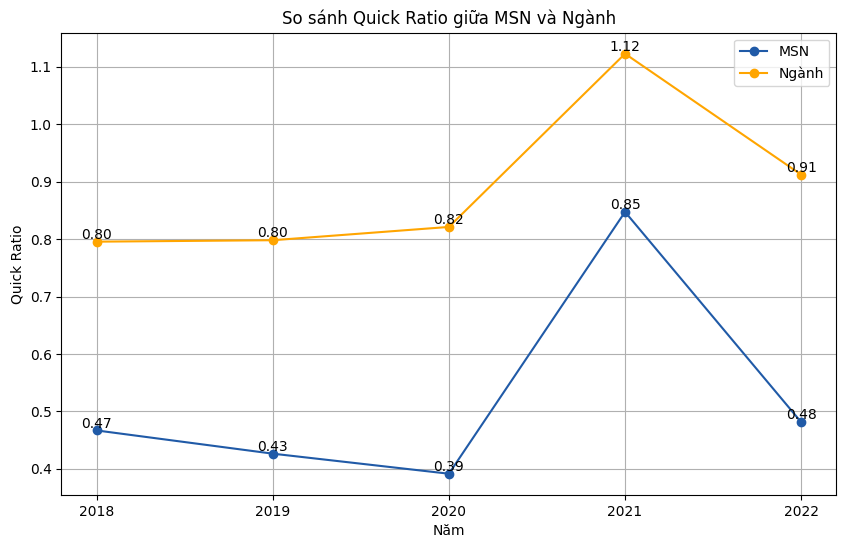

In [ ]:
# Tính Quick Ratio
df_msn['Quick Ratio'] = (df_msn['CĐKT. TÀI SẢN NGẮN HẠN']-(df_msn['CĐKT. Hàng tồn kho, ròng']+ df_msn['CĐKT. Tài sản ngắn hạn khác']))/ df_msn['CĐKT. Nợ ngắn hạn']
df_indus['Quick Ratio'] = (df_indus['CĐKT. TÀI SẢN NGẮN HẠN']-(df_indus['CĐKT. Hàng tồn kho, ròng']+ df_indus['CĐKT. Tài sản ngắn hạn khác']))/ df_indus['CĐKT. Nợ ngắn hạn']
# Dữ liệu
years_msn = df_msn.index.astype(int)
quick_ratio_msn = df_msn['Quick Ratio']

years_indus = df_indus.index.astype(int)
quick_ratio_indus = df_indus['Quick Ratio']

# Vẽ biểu đồ đường
plt.figure(figsize=(10, 6))
plt.plot(years_msn, quick_ratio_msn, label='MSN', marker='o',color="#205AA7")
plt.plot(years_indus, quick_ratio_indus, label='Ngành', marker='o',color="orange")

# Đặt các nhãn và tiêu đề
plt.xlabel('Năm')
plt.ylabel('Quick Ratio')
plt.title('So sánh Quick Ratio giữa MSN và Ngành')

# Chỉnh lại nhãn trục x
plt.xticks(years_msn)

# Thêm giá trị tại các điểm
for i, txt in enumerate(quick_ratio_msn):
    plt.text(years_msn[i], txt, f'{txt:.2f}', ha='center', va='bottom')

for i, txt in enumerate(quick_ratio_indus):
    plt.text(years_indus[i], txt, f'{txt:.2f}', ha='center', va='bottom')

# Hiển thị chú thích
plt.legend()

# Hiển thị biểu đồ
plt.grid(True)
plt.show()

## Tỷ số quản lý tài sản

<ipython-input-203-5c6f7688758a>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_msn['Vòng quay hàng tồn kho'] =(df_msn['KQKD. Doanh thu thuần'] / df_msn['CĐKT. Hàng tồn kho, ròng'])


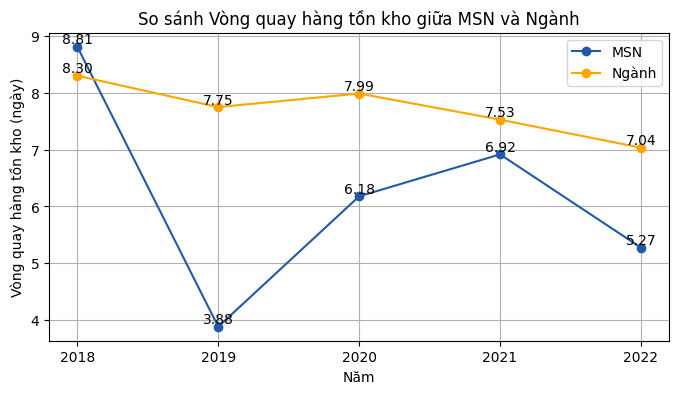

In [ ]:
df_msn['Vòng quay hàng tồn kho'] =(df_msn['KQKD. Doanh thu thuần'] / df_msn['CĐKT. Hàng tồn kho, ròng'])
df_indus['Vòng quay hàng tồn kho'] = (df_indus['KQKD. Doanh thu thuần'] / df_indus['CĐKT. Hàng tồn kho, ròng'])
# Dữ liệu
years_msn = df_msn.index.astype(int)
inventory_turnover_msn = df_msn['Vòng quay hàng tồn kho']
years_indus = df_indus.index.astype(int)
inventory_turnover_indus = df_indus['Vòng quay hàng tồn kho']
# Vẽ biểu đồ đường
plt.figure(figsize=(8, 4))
plt.plot(years_msn, inventory_turnover_msn, label='MSN', marker='o',color="#205AA7")
plt.plot(years_indus, inventory_turnover_indus, label='Ngành', marker='o',color="orange")
# Đặt các nhãn và tiêu đề
plt.xlabel('Năm')
plt.ylabel('Vòng quay hàng tồn kho (ngày)')
plt.title('So sánh Vòng quay hàng tồn kho giữa MSN và Ngành')
# Chỉnh lại nhãn trục x
plt.xticks(years_msn)
# Thêm giá trị tại các điểm
for i, txt in enumerate(inventory_turnover_msn):
    plt.text(years_msn[i], txt, f'{txt:.2f}', ha='center', va='bottom')

for i, txt in enumerate(inventory_turnover_indus):
    plt.text(years_indus[i], txt, f'{txt:.2f}', ha='center', va='bottom')
# Hiển thị chú thích
plt.legend()
# Hiển thị biểu đồ
plt.grid(True)
plt.show()

<ipython-input-204-e44377471abf>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_msn['Vòng quay TCSCĐ'] = df_msn['KQKD. Doanh thu thuần'] / df_msn['CĐKT. Tài sản cố định']


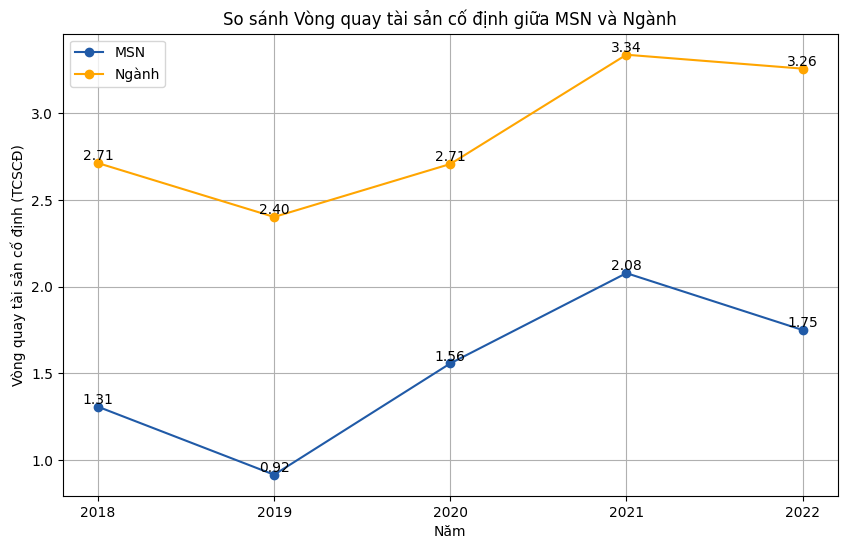

In [ ]:

df_msn['Vòng quay TCSCĐ'] = df_msn['KQKD. Doanh thu thuần'] / df_msn['CĐKT. Tài sản cố định']
df_indus['Vòng quay TCSCĐ'] = df_indus['KQKD. Doanh thu thuần'] / df_indus['CĐKT. Tài sản cố định']

# Dữ liệu
years_msn = df_msn.index.astype(int)
asset_turnover_msn = df_msn['Vòng quay TCSCĐ']

years_indus = df_indus.index.astype(int)
asset_turnover_indus = df_indus['Vòng quay TCSCĐ']

# Vẽ biểu đồ đường
plt.figure(figsize=(10, 6))
plt.plot(years_msn, asset_turnover_msn, label='MSN', marker='o',color="#205AA7")
plt.plot(years_indus, asset_turnover_indus, label='Ngành', marker='o',color="orange")

# Đặt các nhãn và tiêu đề
plt.xlabel('Năm')
plt.ylabel('Vòng quay tài sản cố định (TCSCĐ)')
plt.title('So sánh Vòng quay tài sản cố định giữa MSN và Ngành')

# Chỉnh lại nhãn trục x
plt.xticks(years_msn)

# Thêm giá trị tại các điểm
for i, txt in enumerate(asset_turnover_msn):
    plt.text(years_msn[i], txt, f'{txt:.2f}', ha='center', va='bottom')

for i, txt in enumerate(asset_turnover_indus):
    plt.text(years_indus[i], txt, f'{txt:.2f}', ha='center', va='bottom')

# Hiển thị chú thích
plt.legend()

# Hiển thị biểu đồ
plt.grid(True)
plt.show()

<ipython-input-205-711839dad30f>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_msn['Vòng quay TTS'] = df_msn['KQKD. Doanh thu thuần'] / df_msn['CĐKT. TỔNG CỘNG TÀI SẢN']


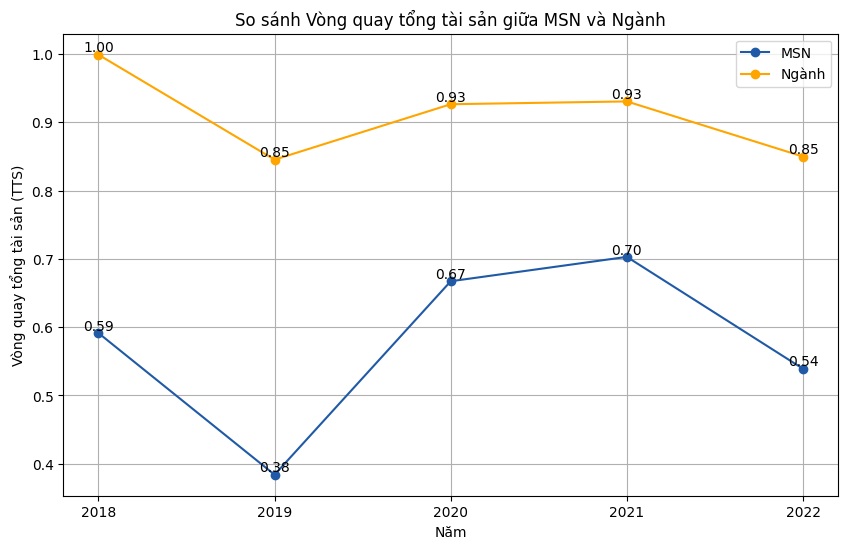

In [ ]:

df_msn['Vòng quay TTS'] = df_msn['KQKD. Doanh thu thuần'] / df_msn['CĐKT. TỔNG CỘNG TÀI SẢN']
df_indus['Vòng quay TTS'] = df_indus['KQKD. Doanh thu thuần'] / df_indus['CĐKT. TỔNG CỘNG TÀI SẢN']
years_msn = df_msn.index.astype(int)
asset_turnover_msn = df_msn['Vòng quay TTS']

years_indus = df_indus.index.astype(int)
asset_turnover_indus = df_indus['Vòng quay TTS']

# Vẽ biểu đồ đường
plt.figure(figsize=(10, 6))
plt.plot(years_msn, asset_turnover_msn, label='MSN', marker='o', color="#205AA7")
plt.plot(years_indus, asset_turnover_indus, label='Ngành', marker='o', color="orange")

# Đặt các nhãn và tiêu đề
plt.xlabel('Năm')
plt.ylabel('Vòng quay tổng tài sản (TTS)')
plt.title('So sánh Vòng quay tổng tài sản giữa MSN và Ngành')

# Chỉnh lại nhãn trục x
plt.xticks(years_msn)

# Thêm giá trị tại các điểm
for i, txt in enumerate(asset_turnover_msn):
    plt.text(years_msn[i], txt, f'{txt:.2f}', ha='center', va='bottom')

for i, txt in enumerate(asset_turnover_indus):
    plt.text(years_indus[i], txt, f'{txt:.2f}', ha='center', va='bottom')

# Hiển thị chú thích
plt.legend()

# Hiển thị biểu đồ
plt.grid(True)
plt.show()

<ipython-input-19-ca7230e61f77>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_msn['ROE'] = df_msn['KQKD. Lợi nhuận sau thuế thu nhập doanh nghiệp'] / df_msn['CĐKT. VỐN CHỦ SỞ HỮU']


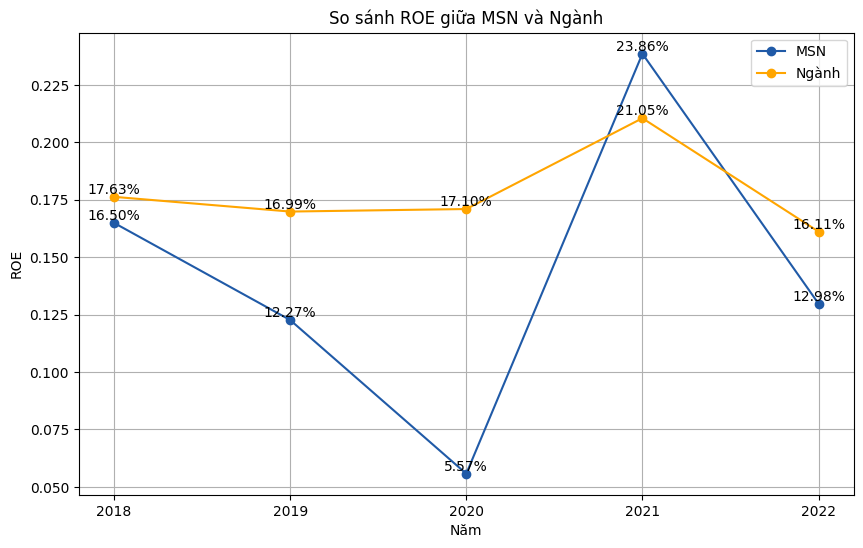

In [ ]:
df_msn['ROE'] = df_msn['KQKD. Lợi nhuận sau thuế thu nhập doanh nghiệp'] / df_msn['CĐKT. VỐN CHỦ SỞ HỮU']
df_indus['ROE'] = df_indus['KQKD. Lợi nhuận sau thuế thu nhập doanh nghiệp'] / df_indus['CĐKT. VỐN CHỦ SỞ HỮU']

# Dữ liệu
years_msn = df_msn.index.astype(int)
roe_msn = df_msn['ROE']

years_indus = df_indus.index.astype(int)
roe_indus = df_indus['ROE']

# Vẽ biểu đồ đường
plt.figure(figsize=(10, 6))
plt.plot(years_msn, roe_msn, label='MSN', marker='o', color="#205AA7")
plt.plot(years_indus, roe_indus, label='Ngành', marker='o', color="orange")

# Đặt các nhãn và tiêu đề
plt.xlabel('Năm')
plt.ylabel('ROE')
plt.title('So sánh ROE giữa MSN và Ngành')

# Chỉnh lại nhãn trục x
plt.xticks(years_msn)

# Thêm giá trị tại các điểm
for i, txt in enumerate(roe_msn):
    plt.text(years_msn[i], txt, f'{txt:.2%}', ha='center', va='bottom')

for i, txt in enumerate(roe_indus):
    plt.text(years_indus[i], txt, f'{txt:.2%}', ha='center', va='bottom')

# Hiển thị chú thích
plt.legend()

# Hiển thị biểu đồ
plt.grid(True)
plt.show()

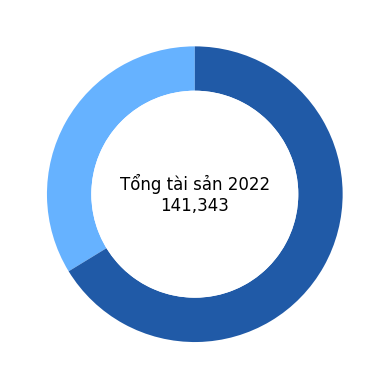

In [ ]:
total_assets_2022 = df_msn['CĐKT. TỔNG CỘNG TÀI SẢN'].loc[2022]
short_term_assets = df_msn['CĐKT. TÀI SẢN NGẮN HẠN'].loc[2022]
long_term_assets = df_msn['CĐKT. TÀI SẢN DÀI HẠN'].loc[2022]



# Màu sắc
colors = ['#66B2FF','#205AA7' ] #Mã đầu màu đỏ LA, màu xanh SA
sizes_donut = [short_term_assets, long_term_assets]


# Vẽ biểu đồ
fig, ax = plt.subplots()
ax.pie(sizes_donut,startangle=90, colors=colors, wedgeprops=dict(width=0.3))

# Vẽ Donut Chart bằng cách thêm vòng trắng vào giữa
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Thêm giá trị tổng tài sản vào vòng tròn chính giữa
plt.text(0, 0, f'Tổng tài sản 2022\n{total_assets_2022/1000000000:,.0f}', ha='center', va='center', fontsize=12, color='black')


# Hiển thị biểu đồ
plt.show()

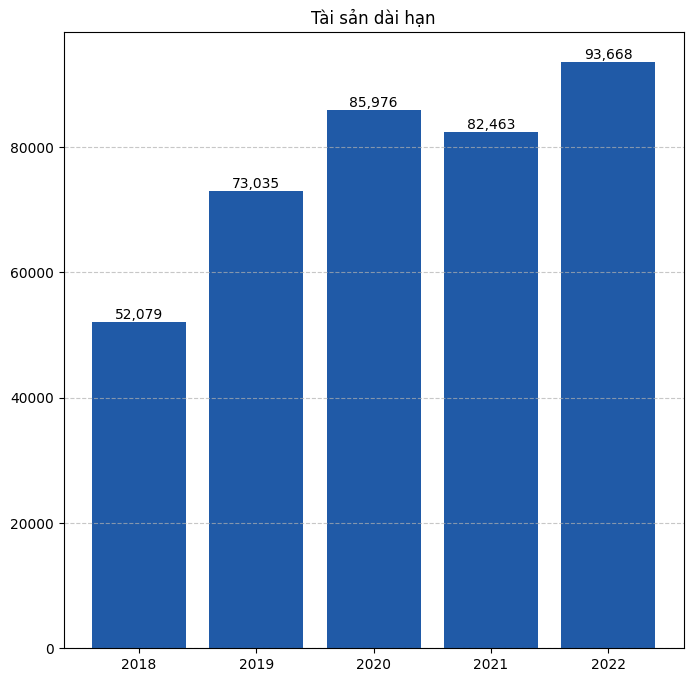

In [ ]:
years = df_msn.index.astype(int)
long_assets = df_msn['CĐKT. TÀI SẢN DÀI HẠN'] / 1000000000  # Chia cho 1000 để đổi sang đơn vị tỷ đồng

# Vẽ biểu đồ cột
plt.figure(figsize=(8, 8))
plt.bar(years, long_assets, color='#205AA7')

# Đặt các nhãn và tiêu đề

plt.title('Tài sản dài hạn')

# Hiển thị giá trị trên cột
for i, value in enumerate(long_assets):
    plt.text(years[i], value, f'{value:,.0f}', ha='center', va='bottom')

# Định dạng trục tung thành đơn vị tỷ đồng
plt.ticklabel_format(axis='y', style='plain', useOffset=False)


# Hiển thị biểu đồ
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


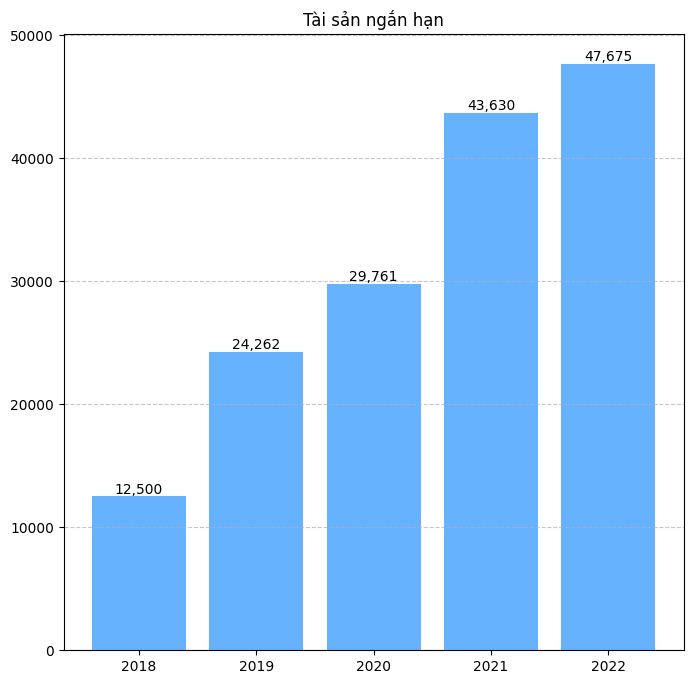

In [ ]:
years = df_msn.index.astype(int)
short_assets = df_msn['CĐKT. TÀI SẢN NGẮN HẠN'] / 1000000000  # Chia cho 1000 để đổi sang đơn vị tỷ đồng

# Vẽ biểu đồ cột
plt.figure(figsize=(8, 8))
plt.bar(years, short_assets, color='#66B2FF')

# Đặt các nhãn và tiêu đề

plt.title('Tài sản ngắn hạn')

# Hiển thị giá trị trên cột
for i, value in enumerate(short_assets):
    plt.text(years[i], value, f'{value:,.0f}', ha='center', va='bottom')

# Định dạng trục tung thành đơn vị tỷ đồng
plt.ticklabel_format(axis='y', style='plain', useOffset=False)


# Hiển thị biểu đồ
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

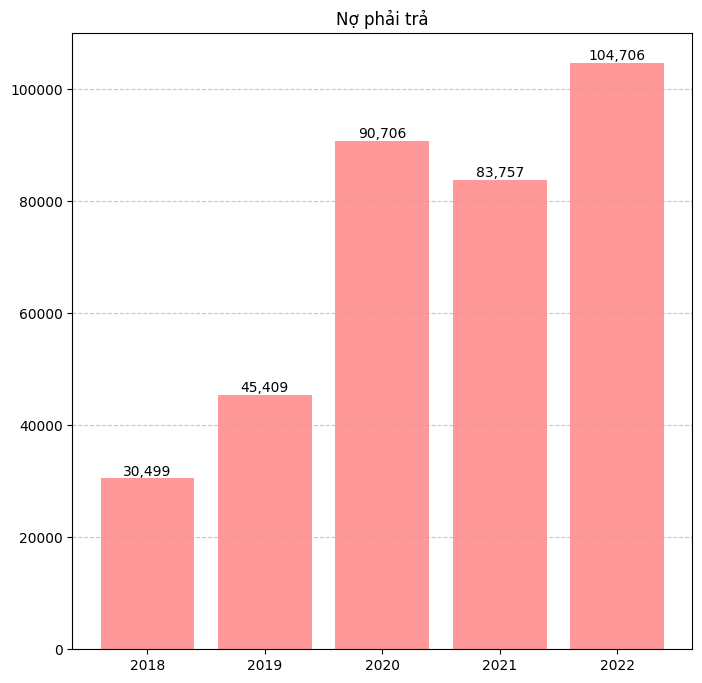

In [ ]:
years = df_msn.index.astype(int)
debt = df_msn['CĐKT. NỢ PHẢI TRẢ'] / 1000000000  # Chia cho 1000 để đổi sang đơn vị tỷ đồng

# Vẽ biểu đồ cột
plt.figure(figsize=(8, 8))
plt.bar(years, debt, color='#FF9999')

# Đặt các nhãn và tiêu đề

plt.title('Nợ phải trả')

# Hiển thị giá trị trên cột
for i, value in enumerate(debt):
    plt.text(years[i], value, f'{value:,.0f}', ha='center', va='bottom')

# Định dạng trục tung thành đơn vị tỷ đồng
plt.ticklabel_format(axis='y', style='plain', useOffset=False)


# Hiển thị biểu đồ
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

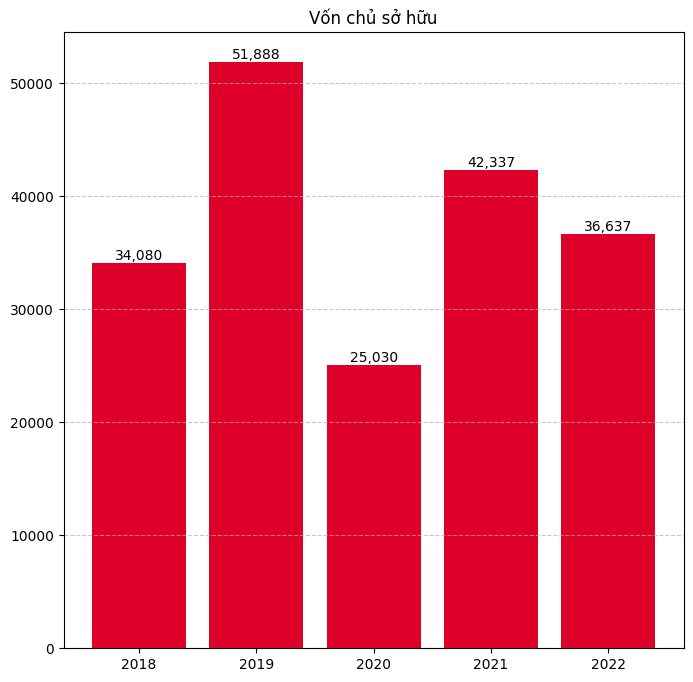

In [ ]:
years = df_msn.index.astype(int)
equity = df_msn['CĐKT. VỐN CHỦ SỞ HỮU'] / 1000000000  # Chia cho 1000 để đổi sang đơn vị tỷ đồng

# Vẽ biểu đồ cột
plt.figure(figsize=(8, 8))
plt.bar(years, equity, color='#DF0029')

# Đặt các nhãn và tiêu đề

plt.title('Vốn chủ sở hữu')

# Hiển thị giá trị trên cột
for i, value in enumerate(equity):
    plt.text(years[i], value, f'{value:,.0f}', ha='center', va='bottom')

# Định dạng trục tung thành đơn vị tỷ đồng
plt.ticklabel_format(axis='y', style='plain', useOffset=False)


# Hiển thị biểu đồ
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

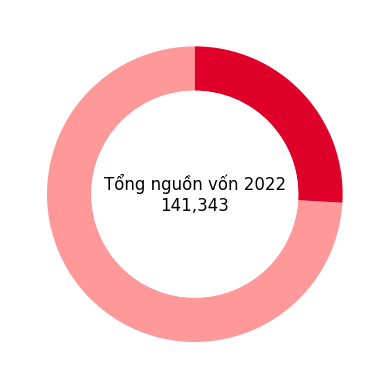

In [ ]:
cap_2022 = df_msn['CĐKT. TỔNG CỘNG NGUỒN VỐN'].loc[2022]
debt = df_msn['CĐKT. NỢ PHẢI TRẢ'].loc[2022]
equity = df_msn['CĐKT. VỐN CHỦ SỞ HỮU'].loc[2022]


# Tạo dữ liệu cho biểu đồ donut
sizes_donut = [debt, equity ]
colors_donut = ['#FF9999', '#DF0029'] #Xanh nợ phải trả, đỏ vốn chủ sở h

# Vẽ biểu đồ donut
fig_donut, ax_donut = plt.subplots()
ax_donut.pie(sizes_donut, startangle=90, colors=colors_donut, wedgeprops=dict(width=0.3))

# Vẽ Donut Chart bằng cách thêm vòng trắng vào giữa
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig_donut = plt.gcf()
fig_donut.gca().add_artist(centre_circle)

# Thêm giá trị tổng nguồn vốn vào vòng tròn chính giữa
ax_donut.text(0, 0, f'Tổng nguồn vốn 2022\n{cap_2022/1000000000:,.0f}', ha='center', va='center', fontsize=12, color='black')

# Hiển thị biểu đồ donut
plt.show()


In [ ]:
df_msn['Vốn lưu động'] = df_msn['CĐKT. TÀI SẢN NGẮN HẠN'] - df_msn['CĐKT. NỢ PHẢI TRẢ']


<ipython-input-38-f5f44ffa6715>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_msn['Vốn lưu động'] = df_msn['CĐKT. TÀI SẢN NGẮN HẠN'] - df_msn['CĐKT. NỢ PHẢI TRẢ']


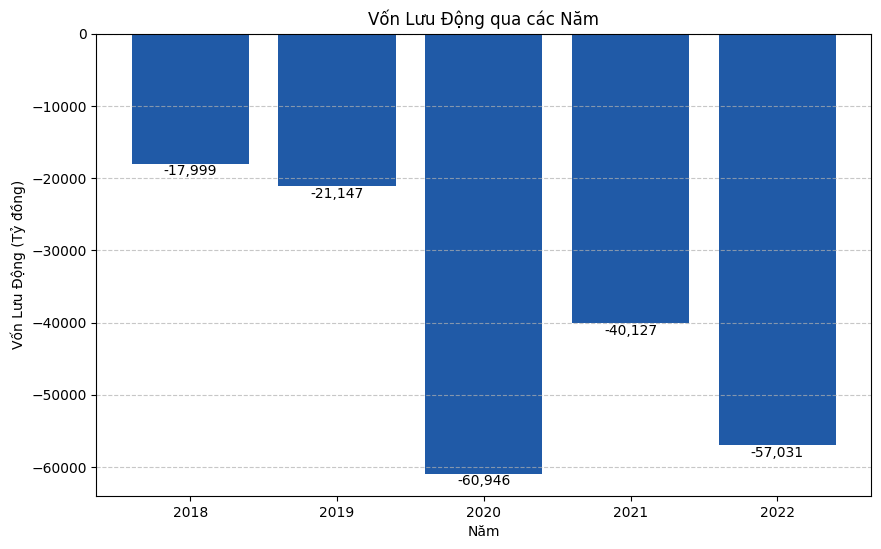

In [ ]:
# Tính vốn lưu động
df_msn['Vốn lưu động'] = df_msn['CĐKT. TÀI SẢN NGẮN HẠN'] - df_msn['CĐKT. NỢ PHẢI TRẢ']

# Dữ liệu
years = df_msn.index.astype(int)
working_capital = df_msn['Vốn lưu động'] /1000000000

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
plt.bar(years, working_capital, color="#205AA7")

# Đặt các nhãn và tiêu đề
plt.xlabel('Năm')
plt.ylabel('Vốn Lưu Động (Tỷ đồng)')
plt.title('Vốn Lưu Động qua các Năm')

# Hiển thị giá trị trên cột
for i, value in enumerate(working_capital):
    plt.text(years[i], value, f'{value:,.0f}', ha='center', va='top')

# Định dạng trục tung thành đơn vị tỷ đồng
plt.ticklabel_format(axis='y', style='plain', useOffset=False)


# Hiển thị biểu đồ
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
#Quản lý nợ
df_msn['Tỷ số nợ vay'] = df_msn['CĐKT. NỢ PHẢI TRẢ'] / df_msn['CĐKT. TỔNG CỘNG TÀI SẢN']
df_msn['Hệ số chi trả'] = df_msn['EBIT'] / df_msn['KQKD. Trong đó: Chi phí lãi vay']



<ipython-input-40-b62df372f4a3>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_msn['Tỷ số nợ vay'] = df_msn['CĐKT. NỢ PHẢI TRẢ'] / df_msn['CĐKT. TỔNG CỘNG TÀI SẢN']
<ipython-input-40-b62df372f4a3>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_msn['Hệ số chi trả'] = df_msn['EBIT'] / df_msn['KQKD. Trong đó: Chi phí lãi vay']


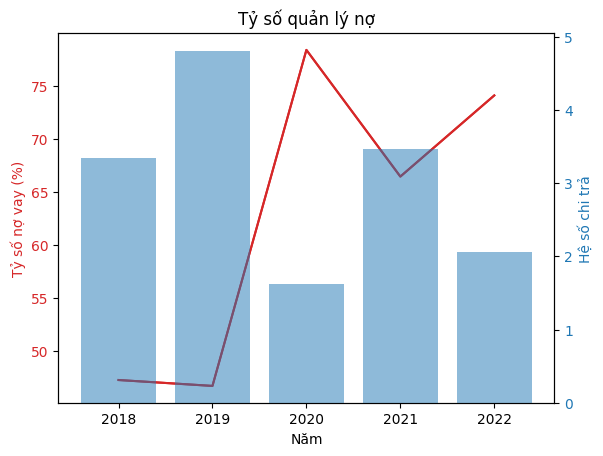

In [ ]:
df_msn['Tỷ số nợ vay'] = df_msn['CĐKT. NỢ PHẢI TRẢ'] / df_msn['CĐKT. TỔNG CỘNG TÀI SẢN']
df_msn['Hệ số chi trả'] = df_msn['EBIT'] / (-df_msn['KQKD. Trong đó: Chi phí lãi vay'])

# Vẽ biểu đồ
fig, ax1 = plt.subplots()



# Tạo một trục thứ hai để vẽ hệ số chi trả dưới dạng cột trên đó
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Hệ số chi trả', color=color)
ax2.bar(df_msn.index, df_msn['Hệ số chi trả'], color=color, alpha=0.5)
ax2.tick_params(axis='y', labelcolor=color)

# Vẽ đường cho tỷ số nợ vay trên trục bên phải
color = 'tab:red'
ax1.set_xlabel('Năm')
ax1.set_ylabel('Tỷ số nợ vay (%)', color=color)
ax1.plot(df_msn.index, df_msn['Tỷ số nợ vay']*100, color=color)
ax1.tick_params(axis='y', labelcolor=color)
# Vẽ đường cho tỷ số nợ vay trên trục bên phải
color = 'tab:red'
ax1.set_xlabel('Năm')
ax1.set_ylabel('Tỷ số nợ vay (%)', color=color)
ax1.plot(df_msn.index, df_msn['Tỷ số nợ vay']*100, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_title('Tỷ số quản lý nợ')
# Hiển thị biểu đồ
plt.show()

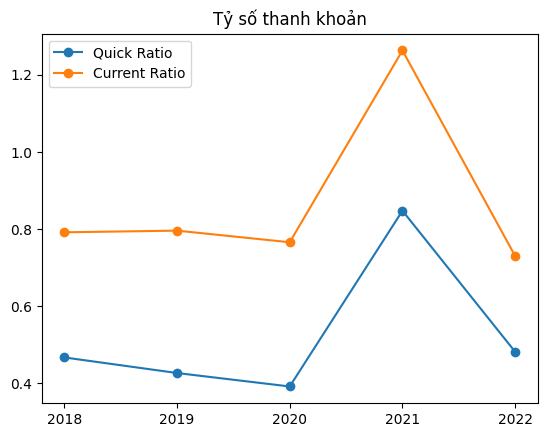

In [ ]:
df_msn.index = df_msn.index.astype(int)

# Tính Quick Ratio và Current Ratio
df_msn['Quick Ratio'] = (df_msn['CĐKT. TÀI SẢN NGẮN HẠN'] - (df_msn['CĐKT. Hàng tồn kho, ròng'] + df_msn['CĐKT. Tài sản ngắn hạn khác'])) / df_msn['CĐKT. Nợ ngắn hạn']
df_msn['Current Ratio'] = df_msn['CĐKT. TÀI SẢN NGẮN HẠN'] / df_msn['CĐKT. Nợ ngắn hạn']

# Tạo figure và trục
fig, ax = plt.subplots()

# Vẽ đường cho Quick Ratio
ax.plot(df_msn.index, df_msn['Quick Ratio'], label='Quick Ratio', marker='o')

# Vẽ đường cho Current Ratio
ax.plot(df_msn.index, df_msn['Current Ratio'], label='Current Ratio', marker='o')

# Đặt tên trục và tiêu đề

ax.set_title('Tỷ số thanh khoản')

# Hiển thị chú thích
ax.legend()

# Chỉ định định dạng nhãn trục x là số nguyên
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Hiển thị biểu đồ
plt.show()

In [ ]:
# Tỷ số sinh lời - Phân tích Dupont
df_msn['ROA'] = df_msn['KQKD. Lợi nhuận sau thuế thu nhập doanh nghiệp'] / df_msn['CĐKT. TỔNG CỘNG TÀI SẢN']
df_indus['ROA'] = df_indus['KQKD. Lợi nhuận sau thuế thu nhập doanh nghiệp'] / df_indus['CĐKT. TỔNG CỘNG TÀI SẢN']




<ipython-input-43-dcaa592f9248>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_msn['ROA'] = df_msn['KQKD. Lợi nhuận sau thuế thu nhập doanh nghiệp'] / df_msn['CĐKT. TỔNG CỘNG TÀI SẢN']


In [ ]:
#Dupont
df_msn['Biên lợi nhuận ròng'] = df_msn['KQKD. Lợi nhuận sau thuế thu nhập doanh nghiệp'] / df_msn['KQKD. Doanh thu thuần']
df_msn['Đòn bẩy tài chính'] = df_msn['CĐKT. TỔNG CỘNG TÀI SẢN'] / df_msn['KQKD. Doanh thu thuần']
df_msn['ROE'] = df_msn['KQKD. Lợi nhuận sau thuế thu nhập doanh nghiệp'] / df_msn['CĐKT. VỐN CHỦ SỞ HỮU']
df_msn['Vòng quay TTS'] = df_msn['KQKD. Doanh thu thuần'] / df_msn['CĐKT. TỔNG CỘNG TÀI SẢN']

<ipython-input-44-0ab6bddf93b2>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_msn['Biên lợi nhuận ròng'] = df_msn['KQKD. Lợi nhuận sau thuế thu nhập doanh nghiệp'] / df_msn['KQKD. Doanh thu thuần']
<ipython-input-44-0ab6bddf93b2>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_msn['Đòn bẩy tài chính'] = df_msn['CĐKT. TỔNG CỘNG TÀI SẢN'] / df_msn['KQKD. Doanh thu thuần']


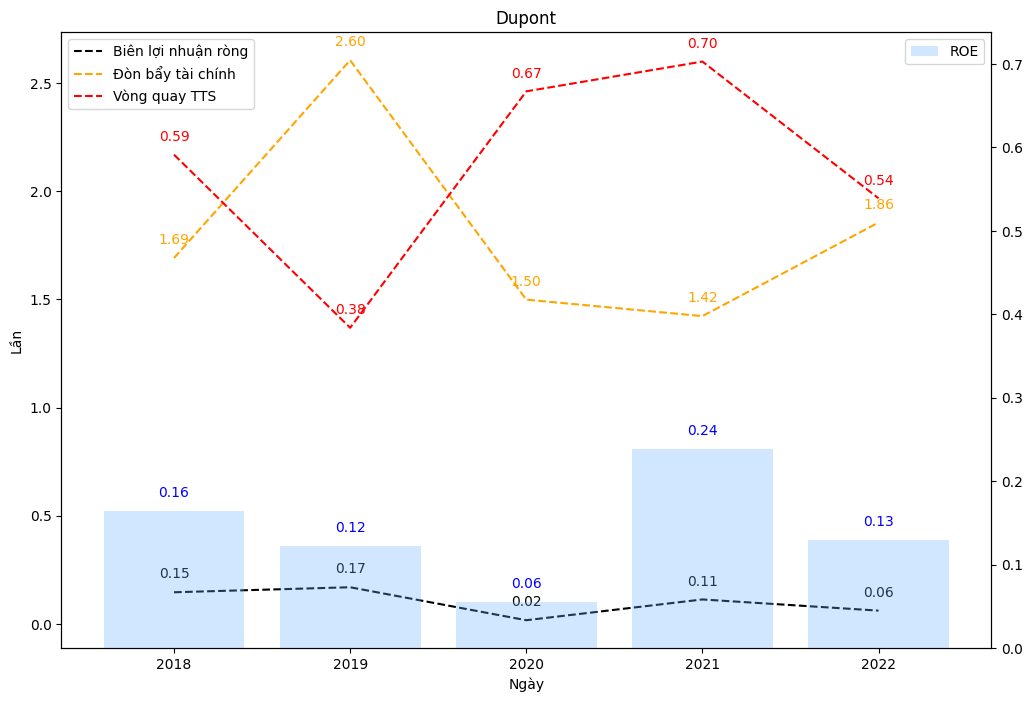

In [ ]:


fig, ax1 = plt.subplots(figsize=(12, 8))

# Vẽ đường cho Biên lợi nhuận ròng và Đòn bẩy tài chính
line1 = ax1.plot(df_msn.index, df_msn['Biên lợi nhuận ròng'], label='Biên lợi nhuận ròng', linestyle='--', color='black')
line2 = ax1.plot(df_msn.index, df_msn['Đòn bẩy tài chính'], label='Đòn bẩy tài chính', linestyle='--', color='orange')

# Tạo secondary axis để vẽ cột cho ROE
ax2 = ax1.twinx()
bar = ax2.bar(df_msn.index, df_msn['ROE'], label='ROE', alpha=0.3, color='#66B2FF')

# Vẽ đường cho Vòng quay TTS
line3 = ax2.plot(df_msn.index, df_msn['Vòng quay TTS'], label='Vòng quay TTS', linestyle='--', color='red')

# Đặt tên cho trục và tiêu đề
ax1.set_xlabel('Ngày')
ax1.set_ylabel('Lần', color='black')

plt.title('Dupont')

# Tạo chú giải
lines = line1 + line2 + line3
labels = [l.get_label() for l in lines]
bars = [bar]
labels += [b.get_label() for b in bars]
ax1.legend(lines, labels, loc='upper left')
ax2.legend(bars, ['ROE'], loc='upper right')

# Thêm giá trị điểm cho Biên lợi nhuận ròng
for i, value in enumerate(df_msn['Biên lợi nhuận ròng']):
    ax1.annotate(f'{value:.2f}', (df_msn.index[i], value), textcoords="offset points", xytext=(0, 10), ha='center', color='black')

# Thêm giá trị điểm cho Đòn bẩy tài chính
for i, value in enumerate(df_msn['Đòn bẩy tài chính']):
    ax1.annotate(f'{value:.2f}', (df_msn.index[i], value), textcoords="offset points", xytext=(0, 10), ha='center', color='orange')

# Thêm giá trị điểm cho ROE
for i, value in enumerate(df_msn['ROE']):
    ax2.annotate(f'{value:.2f}', (df_msn.index[i], value), textcoords="offset points", xytext=(0, 10), ha='center', color='blue')

# Thêm giá trị điểm cho Vòng quay TTS
for i, value in enumerate(df_msn['Vòng quay TTS']):
    ax2.annotate(f'{value:.2f}', (df_msn.index[i], value), textcoords="offset points", xytext=(0, 10), ha='center', color='red')

# Hiển thị biểu đồ
plt.show()


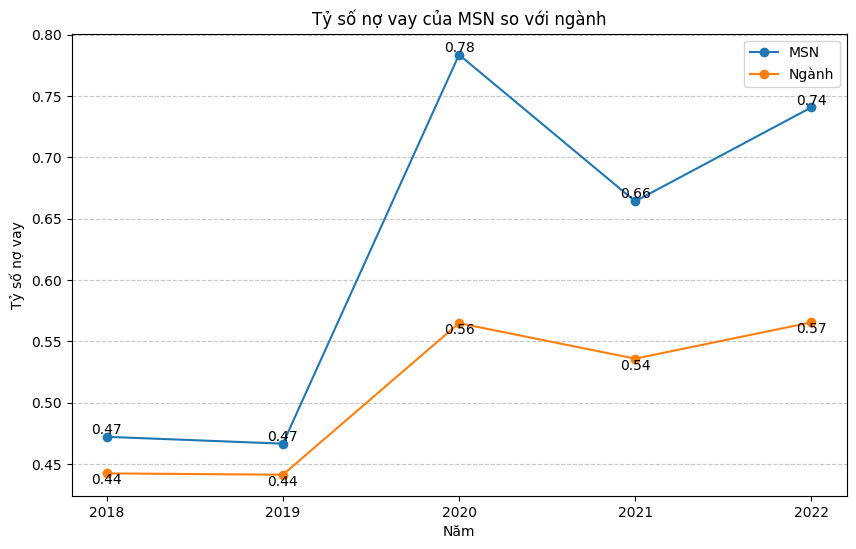

In [ ]:
import matplotlib.pyplot as plt

# Giả sử df_msn và df_indus là DataFrame chứa dữ liệu của bạn

# Chuyển đổi cột thời gian sang kiểu số nguyên
years = df_msn.index.astype(int)

# Tính tỷ số nợ vay cho df_msn và df_indus
debt_ratio_msn = df_msn['CĐKT. NỢ PHẢI TRẢ'] / df_msn['CĐKT. TỔNG CỘNG TÀI SẢN']
debt_ratio_indus = df_indus['CĐKT. NỢ PHẢI TRẢ'] / df_indus['CĐKT. TỔNG CỘNG TÀI SẢN']

# Vẽ biểu đồ đường
plt.figure(figsize=(10, 6))
plt.plot(years, debt_ratio_msn, marker='o', label='MSN')
plt.plot(years, debt_ratio_indus, marker='o', label='Ngành')

# Đặt các nhãn và tiêu đề
plt.xlabel('Năm')
plt.ylabel('Tỷ số nợ vay')
plt.title('Tỷ số nợ vay của MSN so với ngành')
plt.legend()

# Hiển thị giá trị trên đường
for i, value in enumerate(debt_ratio_msn):
    plt.text(years[i], value, f'{value:.2f}', ha='center', va='bottom')

for i, value in enumerate(debt_ratio_indus):
    plt.text(years[i], value, f'{value:.2f}', ha='center', va='top')

# Chỉ định định dạng nhãn trục x là số nguyên
plt.xticks(years.astype(int))

# Hiển thị biểu đồ
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##Tỷ số giá trị thị trường


Xử lý price +volume

In [ ]:
price['Mã'] = price['Code'].apply(lambda x: x.split(':')[-1][:3] if pd.notna(x) and ':' in x else None)

# Reorder the columns with "Mã" at the beginning
new_order = ['Mã'] + [col for col in price.columns if col != 'Mã']
price = price[new_order]
price = price.dropna(subset=['Mã'])


In [ ]:
df['Mã'] = df['Mã'].apply(lambda x: x.split(':')[-1][:3] if pd.notna(x) and ':' in x else None)

# Merge the two DataFrames on the "Mã" column
merged_df = pd.merge(price, data[['Mã', 'Ngành ICB - cấp 4']], on='Mã', how='left')
column_order = ['Mã', 'Ngành ICB - cấp 4'] + [col for col in merged_df.columns if col != 'Mã' and col != 'Ngành ICB - cấp 4']
# Display the merged DataFrame
merged_df = merged_df[column_order]
merged_df = merged_df.drop_duplicates(subset=['Mã'])


<ipython-input-20-a12e393c06fe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Mã'] = df['Mã'].apply(lambda x: x.split(':')[-1][:3] if pd.notna(x) and ':' in x else None)


In [ ]:
indus_p=merged_df[ (merged_df['Ngành ICB - cấp 4'] == 'Thực phẩm')]
indus_p = indus_p.drop(["Ngành ICB - cấp 4",	"Name",	"Code",	"CURRENCY"], axis=1)

In [ ]:
msn_p=indus_p[(indus_p['Mã'] == 'MSN')]
msn_p=msn_p.transpose()
new_header = msn_p.iloc[0]
msn_p = msn_p[1:]
msn_p.columns = new_header
msn_p = msn_p.reset_index()
msn_p = msn_p.rename(columns={'index': 'Date'})
msn_p['Date'] = pd.to_datetime(msn_p['Date']).dt.strftime('%Y/%m/%d')
msn_p = msn_p.rename(columns={'MSN': 'Price'})
msn_p

Mã,Date,Price
0,2015/01/01,46111.09
1,2015/01/02,46111.09
2,2015/01/05,46388.86
3,2015/01/06,46944.42
4,2015/01/07,46944.42
...,...,...
2303,2023/10/31,58200.0
2304,2023/11/01,59500.0
2305,2023/11/02,62700.0
2306,2023/11/03,63900.0


In [ ]:
volume['Mã'] = volume['Code'].apply(lambda x: x.split(':')[-1][:3] if pd.notna(x) and ':' in x else None)

# Reorder the columns with "Mã" at the beginning
new_column = ['Mã'] + [col for col in price.columns if col != 'Mã']
volume = volume[new_column]
volume = volume.dropna(subset=['Mã'])


In [ ]:
df['Mã'] = df['Mã'].apply(lambda x: x.split(':')[-1][:3] if pd.notna(x) and ':' in x else None)

# Merge the two DataFrames on the "Mã" column
merged_vo = pd.merge(volume, data[['Mã', 'Ngành ICB - cấp 4']], on='Mã', how='left')
column_vo = ['Mã', 'Ngành ICB - cấp 4'] + [col for col in merged_vo.columns if col != 'Mã' and col != 'Ngành ICB - cấp 4']
# Display the merged DataFrame
merged_vo = merged_vo[column_order]
merged_vo= merged_vo.drop_duplicates(subset=['Mã'])


<ipython-input-24-840fa68ff249>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Mã'] = df['Mã'].apply(lambda x: x.split(':')[-1][:3] if pd.notna(x) and ':' in x else None)


In [ ]:
indus_v=merged_vo[ (merged_vo['Ngành ICB - cấp 4'] == 'Thực phẩm')]
indus_v = indus_v.drop(["Ngành ICB - cấp 4",	"Name",	"Code",	"CURRENCY"], axis=1)

In [ ]:
msn_v=indus_v[(indus_v['Mã'] == 'MSN')]
msn_v=msn_v.transpose()
new_header = msn_v.iloc[0]
msn_v = msn_v[1:]
msn_v.columns = new_header
msn_v = msn_v.reset_index()
msn_v = msn_v.rename(columns={'index': 'Date'})
msn_v['Date'] = pd.to_datetime(msn_v['Date']).dt.strftime('%Y/%m/%d')
msn_v = msn_v.rename(columns={'MSN': 'Volume'})
msn_v

Mã,Date,Volume
0,2015/01/01,NaN
1,2015/01/02,NaN
2,2015/01/05,188.1
3,2015/01/06,297.4
4,2015/01/07,216.5
...,...,...
2303,2023/10/31,2913.3
2304,2023/11/01,1807.9
2305,2023/11/02,1571.4
2306,2023/11/03,1619.4


In [ ]:
msncp = pd.merge( msn_p, msn_v,on='Date')
msncp

Mã,Date,Price,Volume
0,2015/01/01,46111.09,NaN
1,2015/01/02,46111.09,NaN
2,2015/01/05,46388.86,188.1
3,2015/01/06,46944.42,297.4
4,2015/01/07,46944.42,216.5
...,...,...,...
2303,2023/10/31,58200.0,2913.3
2304,2023/11/01,59500.0,1807.9
2305,2023/11/02,62700.0,1571.4
2306,2023/11/03,63900.0,1619.4


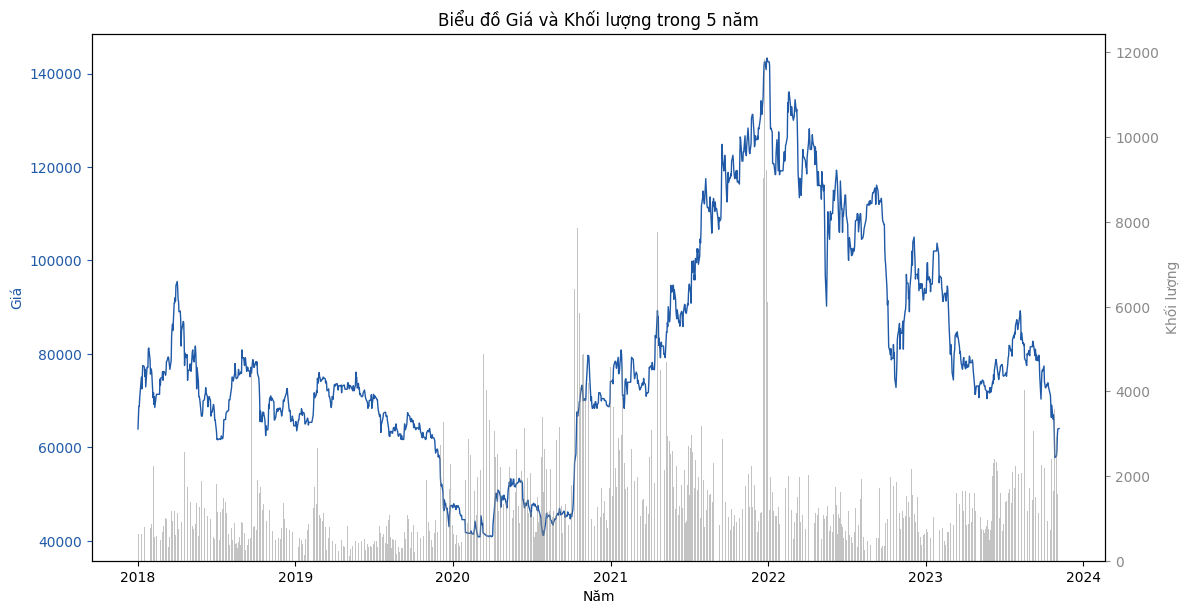

In [ ]:
msncp['Date'] = pd.to_datetime(msncp['Date'])

# Lọc dữ liệu từ năm 2018 trở đi
msncp1 = msncp[msncp['Date'].dt.year >= 2018]

# Tạo subplot với 2 trục y
fig, ax1 = plt.subplots(figsize=(12, 6))

# Biểu diễn giá trên trục y1 với đường mỏng hơn (linewidth=1)
ax1.plot(msncp1['Date'], msncp1['Price'], linestyle='-', color='#205AA7', linewidth=1, label='Giá')
ax1.set_xlabel('Năm')
ax1.set_ylabel('Giá', color='#205AA7')
ax1.tick_params('y', colors='#205AA7')

# Tạo trục y2 cho khối lượng
ax2 = ax1.twinx()
ax2.bar(msncp1['Date'], msncp1['Volume'], color='#898989', alpha=0.5, label='Khối lượng')
ax2.set_ylabel('Khối lượng', color='#898989')
ax2.tick_params('y', colors='#898989')

# Hiển thị chú thích
fig.tight_layout()
plt.title('Biểu đồ Giá và Khối lượng trong 5 năm')
plt.show()

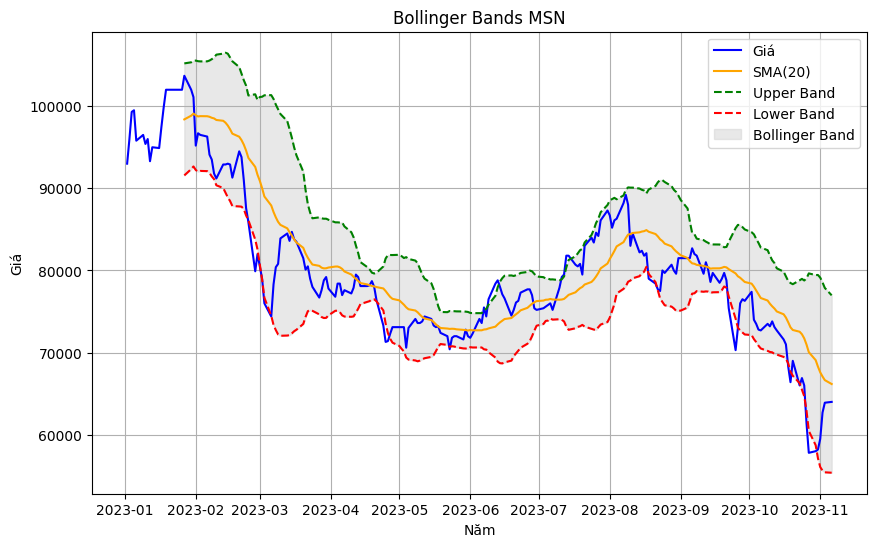

In [ ]:
# Chuyển cột 'Date' thành kiểu datetime
msncp['Date'] = pd.to_datetime(msncp['Date'])

# Tính toán giá trung bình động (SMA) chỉ cho dữ liệu từ năm 2023 trở đi
msncp['SMA'] = msncp.loc[msncp['Date'].dt.year >=2023,'Price'].rolling(window=20).mean()

# Tính toán độ đo dao động (Standard Deviation) chỉ cho dữ liệu từ năm 2023 trở đi
msncp['STD'] = msncp.loc[msncp['Date'].dt.year>= 2023, 'Price'].rolling(window=20).std()

# Tính toán Upper Band và Lower Band chỉ cho dữ liệu từ năm 2023 trở đi
msncp['UpperBand'] = msncp['SMA'] + (2 * msncp['STD'])
msncp['LowerBand'] = msncp['SMA'] - (2 * msncp['STD'])

msncp['Giá']= msncp.loc[msncp['Date'].dt.year >= 2023, 'Price']
# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(msncp['Date'], msncp['Giá'], label='Giá', color='blue')
plt.plot(msncp['Date'], msncp['SMA'], label='SMA(20)', color='orange')
plt.plot(msncp['Date'], msncp['UpperBand'], label='Upper Band', linestyle='--', color='green')
plt.plot(msncp['Date'], msncp['LowerBand'], label='Lower Band', linestyle='--', color='red')

plt.fill_between(msncp['Date'], msncp['UpperBand'], msncp['LowerBand'], color='lightgray', alpha=0.5, label='Bollinger Band')

plt.title('Bollinger Bands MSN')
plt.xlabel('Năm')
plt.ylabel('Giá')
plt.legend()
plt.grid(True)
plt.show()


--> không làm được cho đường bollinger band bắt đầu bằng với đường giá --> nghiên cứu thêm

<ipython-input-30-1a4fd19ad820>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  msncp2['EMA12'] = msncp2['Price'].ewm(span=12, adjust=False).mean()
<ipython-input-30-1a4fd19ad820>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  msncp2['EMA26'] = msncp2['Price'].ewm(span=26, adjust=False).mean()
<ipython-input-30-1a4fd19ad820>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

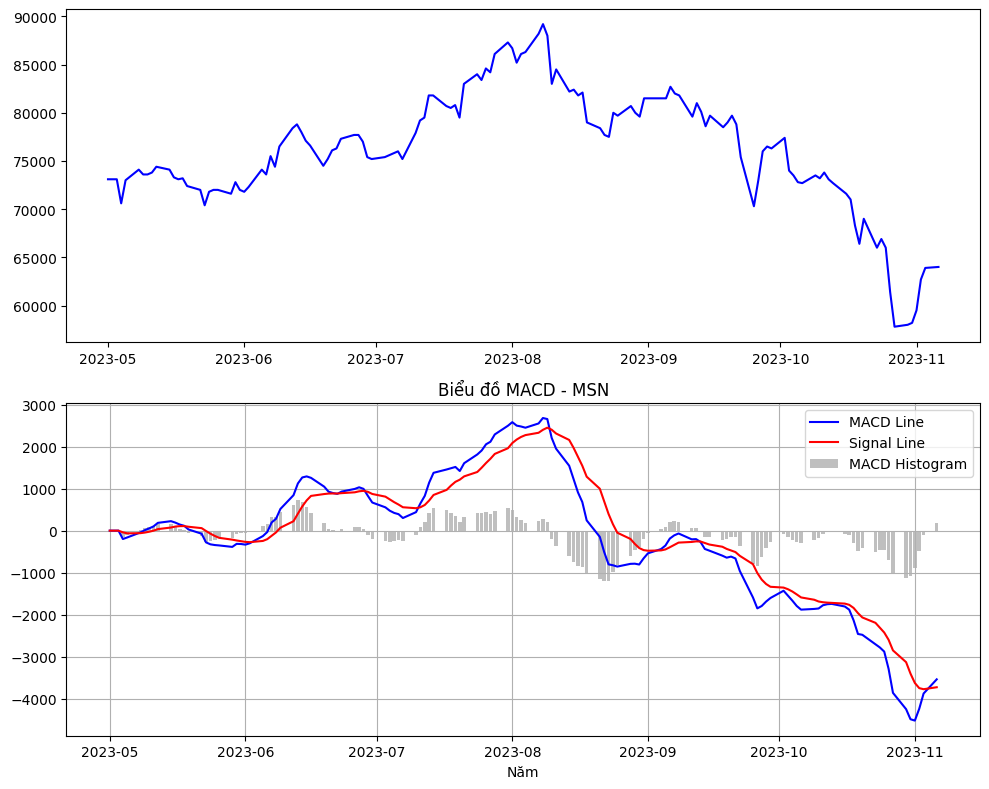

In [ ]:

# Lọc dữ liệu từ tháng 5 năm 2023 trở đi
msncp2 = msncp[msncp['Date'] >= '2023-05-01']

# Tính toán giá trung bình động ngắn hạn (EMA12) và dài hạn (EMA26)
msncp2['EMA12'] = msncp2['Price'].ewm(span=12, adjust=False).mean()
msncp2['EMA26'] = msncp2['Price'].ewm(span=26, adjust=False).mean()

# Tính toán MACD line (EMA12 - EMA26)
msncp2['MACD_Line'] = msncp2['EMA12'] - msncp2['EMA26']

# Tính toán MACD Signal line (9-period EMA của MACD line)
msncp2['MACD_Signal_Line'] = msncp2['MACD_Line'].ewm(span=9, adjust=False).mean()

# Tính toán histogram MACD (MACD line - MACD Signal line)
msncp2['MACD_Histogram'] = msncp2['MACD_Line'] - msncp2['MACD_Signal_Line']

# Vẽ biểu đồ
plt.figure(figsize=(10, 8))

# Vẽ biểu đồ giá và MACD
plt.subplot(2, 1, 1)
plt.plot(msncp2['Date'], msncp2['Price'], label='Giá', color='blue')


plt.subplot(2, 1, 2)
plt.plot(msncp2['Date'], msncp2['MACD_Line'], label='MACD Line', color='blue')
plt.plot(msncp2['Date'], msncp2['MACD_Signal_Line'], label='Signal Line', color='red')
plt.bar(msncp2['Date'], msncp2['MACD_Histogram'], label='MACD Histogram', color='gray', alpha=0.5)
plt.title('Biểu đồ MACD - MSN')

plt.xlabel('Năm')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#Tính P/E
msn_p['Date'] = pd.to_datetime(msn_p['Date'])
P2018= (msn_p.loc[(msn_p['Date']=="2018-12-31"),"Price"].values[0])
P2019= (msn_p.loc[(msn_p['Date']=="2019-12-31"),"Price"].values[0])
P2020= (msn_p.loc[(msn_p['Date']=="2020-12-31"),"Price"].values[0])
P2021= (msn_p.loc[(msn_p['Date']=="2021-12-31"),"Price"].values[0])
P2022= (msn_p.loc[(msn_p['Date']=="2022-12-30"),"Price"].values[0]) #năm này không có ngày 31

P2022


93000.0

In [ ]:
df_msn['KQKD. Lãi cơ bản trên cổ phiếu']

Năm
2018.0    4561.0
2019.0    4766.0
2020.0    1054.0
2021.0    7269.0
2022.0    2511.0
Name: KQKD. Lãi cơ bản trên cổ phiếu, dtype: float64

In [ ]:
import pandas as pd

# Tạo DataFrame 1
data_msn = {
    'Năm': [2018, 2019, 2020, 2021, 2022],
    'KQKD. Lãi cơ bản trên cổ phiếu': [0]
}
data_msn['KQKD. Lãi cơ bản trên cổ phiếu']=df_msn['KQKD. Lãi cơ bản trên cổ phiếu']
df_msn3 = pd.DataFrame(data_msn)
df_msn3.set_index('Năm', inplace=True)

# Tạo DataFrame 2
data_pe = {
    'Năm': [2018, 2019, 2020, 2021, 2022],
    'PE': [P2018, P2019, P2020, P2021, P2022]
}

df_pe = pd.DataFrame(data_pe)
df_pe.set_index('Năm', inplace=True)

# Tính tỷ lệ
pe_msn = df_pe['PE'] / df_msn3['KQKD. Lãi cơ bản trên cổ phiếu']

# In kết quả
pe_msn


Năm
2018    14.159904
2019     9.879001
2020    70.287770
2021    19.603783
2022    37.037037
dtype: float64

In [ ]:
indus_p=indus_p.transpose()
new_header = indus_p.iloc[0]
indus_p= indus_p[1:]
indus_p.columns = new_header
indus_p = indus_p.reset_index()
indus_p = indus_p.rename(columns={'index': 'Date'})

indus_p['Date'] = pd.to_datetime(indus_p['Date'])


indus_p

Mã,Date,C22,ANT,AGM,BBC,BLT,CBS,CLX,CMF,CMN,...,SBT,PAN,TFC,VNM,VSF,VOC,BMV,VHF,VLF,VSN
0,2015-01-01,NaN,NaN,11500,56000,NaN,NaN,NaN,NaN,NaN,...,7953.63,20551.55,NaN,46054.69,NaN,NaN,NaN,11700,6000,NaN
1,2015-01-02,NaN,NaN,11500.0,56000.0,NaN,NaN,NaN,NaN,NaN,...,7953.63,20551.55,NaN,46054.69,NaN,NaN,NaN,11700.0,6000.0,NaN
2,2015-01-05,NaN,NaN,11500.0,56000.0,NaN,NaN,NaN,NaN,NaN,...,7953.63,20062.23,NaN,46295.81,NaN,NaN,NaN,11700.0,6000.0,NaN
3,2015-01-06,NaN,NaN,11500.0,59500.0,NaN,NaN,NaN,NaN,NaN,...,7891.98,19719.7,NaN,46295.81,NaN,NaN,NaN,11700.0,6000.0,NaN
4,2015-01-07,NaN,NaN,11500.0,58000.0,NaN,NaN,NaN,NaN,NaN,...,7830.32,19719.7,NaN,47260.3,NaN,NaN,NaN,11600.0,6100.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2303,2023-10-31,12000.0,10300.0,6280.0,52000.0,32000.0,28900.0,13300.0,182000.0,70000.0,...,13000.0,17500.0,6600.0,68000.0,37800.0,23600.0,44800.0,20000.0,1100.0,22300.0
2304,2023-11-01,12000.0,10300.0,6280.0,51900.0,34500.0,29400.0,13600.0,182000.0,70000.0,...,13500.0,17700.0,7000.0,70400.0,37400.0,23700.0,44800.0,20000.0,1100.0,22300.0
2305,2023-11-02,12000.0,10500.0,6280.0,51900.0,33600.0,30000.0,13900.0,182000.0,70000.0,...,14100.0,18300.0,6400.0,70900.0,38000.0,23900.0,44800.0,20000.0,1100.0,22300.0
2306,2023-11-03,12000.0,10800.0,6280.0,52000.0,34800.0,30500.0,13900.0,190000.0,70000.0,...,13950.0,18200.0,7000.0,70000.0,38000.0,23800.0,44800.0,20000.0,1200.0,22000.0


In [ ]:
induscp2018 = indus_p[indus_p['Date']=="2018-12-31"].mean(axis=1)
induscp2019 = indus_p[indus_p['Date']=="2019-12-31"].mean(axis=1)
induscp2020 = indus_p[indus_p['Date']=="2020-12-31"].mean(axis=1)
induscp2021 = indus_p[indus_p['Date']=="2021-12-31"].mean(axis=1)
induscp2022 = indus_p[indus_p['Date']=="2022-12-30"].mean(axis=1)
induscp2019

<ipython-input-35-c7db66239608>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  induscp2018 = indus_p[indus_p['Date']=="2018-12-31"].mean(axis=1)
<ipython-input-35-c7db66239608>:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  induscp2019 = indus_p[indus_p['Date']=="2019-12-31"].mean(axis=1)
<ipython-input-35-c7db66239608>:3: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  induscp2020 = indus_p[indus_p['Date']=="2020-12-31"].mean(axis=1)
<ipython-input-35-c7db66239608>:4: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  induscp2021 = indus_p[indus_p['Date']=="2021-12-31"].mean(axis=1)
<ipython-inp

1303    28284.791818
dtype: float64

In [ ]:
data_indus = {
    'Năm': [2018, 2019, 2020, 2021, 2022],
    'KQKD. Lãi cơ bản trên cổ phiếu': [0]
}
data_indus['KQKD. Lãi cơ bản trên cổ phiếu']=df_indus['KQKD. Lãi cơ bản trên cổ phiếu']
df_indus1 = pd.DataFrame(data_msn)
df_indus1.set_index('Năm', inplace=True)

# Tạo DataFrame 2
data_pei = {
    'Năm': [2018, 2019, 2020, 2021, 2022],
    'PE': [induscp2018, induscp2019,induscp2020,induscp2021, induscp2022]
}

df_pei = pd.DataFrame(data_pei)
df_pei.set_index('Năm', inplace=True)

# Tính tỷ lệ
pe_indus = df_pei['PE'] / df_indus1['KQKD. Lãi cơ bản trên cổ phiếu']

pe_indus


Năm
2018     1042    6.690908
dtype: float64
2019     1303    5.934702
dtype: float64
2020    1565    28.611848
dtype: float64
2021     1826    5.527028
dtype: float64
2022    2086    13.457962
dtype: float64
dtype: object

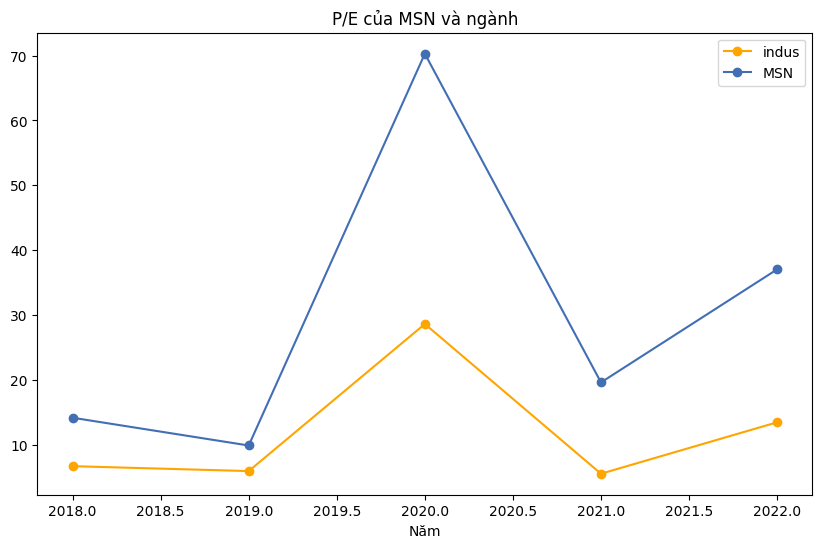

In [ ]:
plt.figure(figsize=(10, 6))

# Vẽ đường cho cột thứ 3
plt.plot(pe_indus, label='indus', marker='o',color="orange")

# Vẽ đường cho tỷ lệ
plt.plot(pe_msn, label='MSN', marker='o',color="#426EB4")

# Đặt tên trục và tiêu đề
plt.xlabel('Năm')

plt.title('P/E của MSN và ngành')



# Hiển thị chú thích
plt.legend()


# Hiển thị biểu đồ
plt.show()